# Clustering Drugs and Classes

In [1]:
# Importing basic libraries
import pandas as pd
import numpy as np
import time
import datetime

# Plotting libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={'figure.figsize':(12,10)})
plt.style.use('fivethirtyeight')
from tqdm import tqdm

from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize

In [2]:
# Loading the dataset
df = pd.read_csv('../Processed_Data/drugs_pct_changes_monthly_since2014_V3.csv')
df.head(10)

,NDC,Product,Major Class,Acute/Chronic,Prod Form,Pack Size,Pack Quantity,WAC,Month,Year,TRx,Date,Pct_change,changed
0,2143301,TRULICITY 10/2014 LLY,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,244.16,10,2014,NaN,2014_10,NaN,0
1,2143301,TRULICITY 10/2014 LLY,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,244.16,11,2014,6.0,2014_11,0.00000,0
2,2143301,TRULICITY 10/2014 LLY,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,244.16,12,2014,22.0,2014_12,0.00000,0
3,2143301,TRULICITY 10/2014 LLY,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,244.16,1,2015,21.0,2015_01,0.00000,0
4,2143301,TRULICITY 10/2014 LLY,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,244.16,2,2015,15.0,2015_02,0.00000,0
5,2143301,TRULICITY 10/2014 LLY,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,244.16,3,2015,33.0,2015_03,0.00000,0
6,2143301,TRULICITY 10/2014 LLY,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,244.16,4,2015,47.0,2015_04,0.00000,0
7,2143301,TRULICITY 10/2014 LLY,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,265.90,5,2015,36.0,2015_05,0.08904,1
8,2143301,TRULICITY 10/2014 LLY,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,265.90,6,2015,54.0,2015_06,0.00000,0
9,2143301,TRULICITY 10/2014 LLY,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,265.90,7,2015,55.0,2015_07,0.00000,0


In [3]:
df = df[df.Year != 2020]

## Based on TRX

In [4]:
df = df.groupby("NDC").transform(lambda x: x.fillna(method='ffill'))

In [5]:
trx = df.groupby(['Major Class', 'Date']).TRx.sum().unstack().transpose().copy()
trx.head()

Major Class,A.C.T.H.,A05A1 CHOLERETICS+CHOLEKINETIC,ADHD,ALL OTHER RESPIRATORY,ALL OTHER THERAPEUTICS,ALL OTHER UROLOGICAL,"ALLERGY, SYSTEMIC & NASAL",ANTI-ALZHEIMERS,"ANTI-ANAEMICS, IRON AND ALL COMBINATIONS",ANTI-INFLAMMATORY AND DIGESTIVE ENZYMES AND MODULA,...,RESPIRATORY AGENTS,"SEX HORMONES (ANDROGENS, OESTROGENS, PROGESTOGENS,",SPEC IMMUNOGLOBULINS & ANTITOXIC SERA,SYST ANTIFUNGALS,THROMBOPOIETIN AGONISTS,THYROID ANTI-THYROID AND IODINE PREPS,URINARY INCONTINENCE,"VACCINES (PURE, COMB, OTHER)",VIRAL HEPATITIS,VITAMINS & MINERALS
Date,,,,,,,,,,,,,,,,,,,,,
2014_08,2590.0,NaN,1419308.0,559.0,88732.0,34008.0,80851.0,927023.0,4740.0,78288.0,...,5803135.0,705004.0,NaN,5788.0,155.0,1871470.0,543747.0,273977.0,61659.0,1052.0
2014_09,2865.0,NaN,1479415.0,617.0,86292.0,34105.0,84698.0,947541.0,4665.0,80983.0,...,6194971.0,706012.0,NaN,6000.0,124.0,1889276.0,545202.0,437214.0,48981.0,1158.0
2014_10,2656.0,NaN,1569909.0,594.0,95426.0,35069.0,82018.0,948974.0,4580.0,84327.0,...,6426457.0,726187.0,NaN,6245.0,131.0,1938759.0,564256.0,776294.0,43253.0,1160.0
2014_11,2503.0,NaN,1411803.0,619.0,97675.0,32128.0,44888.0,858943.0,4170.0,76945.0,...,5941924.0,657100.0,NaN,5405.0,137.0,1788978.0,516835.0,515868.0,41046.0,1004.0
2014_12,3078.0,NaN,1508548.0,1389.0,112056.0,35810.0,47736.0,921016.0,4430.0,175881.0,...,6810177.0,744867.0,NaN,6509.0,175.0,3898129.0,570719.0,431902.0,53042.0,1221.0


In [6]:
trx_change = df.groupby(['Major Class', 'Date']).TRx.sum().unstack().transpose().pct_change().iloc[1:, :]
trx_change.head()

Major Class,A.C.T.H.,A05A1 CHOLERETICS+CHOLEKINETIC,ADHD,ALL OTHER RESPIRATORY,ALL OTHER THERAPEUTICS,ALL OTHER UROLOGICAL,"ALLERGY, SYSTEMIC & NASAL",ANTI-ALZHEIMERS,"ANTI-ANAEMICS, IRON AND ALL COMBINATIONS",ANTI-INFLAMMATORY AND DIGESTIVE ENZYMES AND MODULA,...,RESPIRATORY AGENTS,"SEX HORMONES (ANDROGENS, OESTROGENS, PROGESTOGENS,",SPEC IMMUNOGLOBULINS & ANTITOXIC SERA,SYST ANTIFUNGALS,THROMBOPOIETIN AGONISTS,THYROID ANTI-THYROID AND IODINE PREPS,URINARY INCONTINENCE,"VACCINES (PURE, COMB, OTHER)",VIRAL HEPATITIS,VITAMINS & MINERALS
Date,,,,,,,,,,,,,,,,,,,,,
2014_09,0.106178,NaN,0.042350,0.103757,-0.027499,0.002852,0.047581,0.022133,-0.015823,0.034424,...,0.067521,0.001430,NaN,0.036628,-0.200000,0.009514,0.002676,0.595805,-0.205615,0.100760
2014_10,-0.072949,NaN,0.061169,-0.037277,0.105850,0.028266,-0.031642,0.001512,-0.018221,0.041293,...,0.037367,0.028576,NaN,0.040833,0.056452,0.026192,0.034949,0.775547,-0.116943,0.001727
2014_11,-0.057605,NaN,-0.100710,0.042088,0.023568,-0.083863,-0.452706,-0.094872,-0.089520,-0.087540,...,-0.075397,-0.095137,NaN,-0.134508,0.045802,-0.077256,-0.084042,-0.335473,-0.051025,-0.134483
2014_12,0.229724,NaN,0.068526,1.243942,0.147233,0.114604,0.063447,0.072267,0.062350,1.285802,...,0.146123,0.133567,NaN,0.204255,0.277372,1.178970,0.104258,-0.162766,0.292257,0.216135
2015_01,-0.340156,NaN,-0.013604,0.897048,-0.023238,-0.107065,-0.197210,-0.035169,-0.083296,-0.540832,...,-0.062906,-0.088586,NaN,-0.108465,-0.160000,-0.525456,-0.072326,-0.177698,-0.033615,-0.099099


In [7]:
cluster_df = trx_change.transpose().fillna(0)
cluster_df = cluster_df.replace(np.inf, 0)
cluster_df

Date,2014_09,2014_10,2014_11,2014_12,2015_01,2015_02,2015_03,2015_04,2015_05,2015_06,...,2019_03,2019_04,2019_05,2019_06,2019_07,2019_08,2019_09,2019_10,2019_11,2019_12
Major Class,,,,,,,,,,,,,,,,,,,,,
A.C.T.H.,0.106178,-0.072949,-0.057605,0.229724,-0.340156,0.051206,0.261358,-0.053101,-0.135294,0.201814,...,0.063596,0.087113,0.006638,-0.157325,0.083287,-0.023736,-0.072939,0.064424,-0.152651,0.111252
A05A1 CHOLERETICS+CHOLEKINETIC,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-0.500000,1.000000,-0.500000,0.000000,0.000000,1.000000,-0.500000,0.000000,0.000000
ADHD,0.042350,0.061169,-0.100710,0.068526,-0.013604,-0.084593,0.128879,-0.019649,-0.045605,-0.068187,...,0.093519,0.008736,-0.010481,-0.147966,0.050919,0.088962,-0.030492,0.091700,-0.077546,0.028880
ALL OTHER RESPIRATORY,0.103757,-0.037277,0.042088,1.243942,0.897048,0.522960,0.655370,0.189372,-0.026579,0.182031,...,0.034039,0.031803,0.041529,-0.050880,0.087468,-0.034708,-0.059510,0.127937,-0.181166,0.156038
ALL OTHER THERAPEUTICS,-0.027499,0.105850,0.023568,0.147233,-0.023238,-0.047272,0.123506,-0.035559,0.003478,0.042263,...,0.096717,-0.013321,-0.007566,-0.102403,0.087490,-0.017589,-0.063026,0.059482,-0.035587,0.126942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
THYROID ANTI-THYROID AND IODINE PREPS,0.009514,0.026192,-0.077256,1.178970,-0.525456,-0.095469,0.112229,-0.031593,-0.008417,0.025208,...,0.078536,0.015600,0.001901,-0.073574,0.064319,-0.031994,-0.053615,0.064132,-0.088381,0.083240
URINARY INCONTINENCE,0.002676,0.034949,-0.084042,0.104258,-0.072326,-0.104446,0.112325,-0.031562,-0.007080,0.029069,...,0.099143,0.008894,-0.095389,-0.085343,0.041456,-0.025775,-0.048011,0.068894,-0.068329,0.069155
"VACCINES (PURE, COMB, OTHER)",0.595805,0.775547,-0.335473,-0.162766,-0.177698,-0.123715,0.042263,-0.069538,0.005653,0.114658,...,-0.016370,-0.051546,0.098284,-0.008971,0.087489,0.166133,0.254385,8.968056,-0.585206,-0.507431


In [8]:
X = cluster_df.values
X

array([[ 1.06177606e-01, -7.29493892e-02, -5.76054217e-02, ...,
         6.44241733e-02, -1.52651312e-01,  1.11251580e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -5.00000000e-01,  0.00000000e+00,  0.00000000e+00],
       [ 4.23495112e-02,  6.11687728e-02, -1.00710296e-01, ...,
         9.17001445e-02, -7.75463698e-02,  2.88799598e-02],
       ...,
       [ 5.95805487e-01,  7.75546986e-01, -3.35473416e-01, ...,
         8.96805597e+00, -5.85206081e-01, -5.07430560e-01],
       [-2.05614752e-01, -1.16943305e-01, -5.10253624e-02, ...,
         1.03109496e-01, -1.19433559e-01,  9.70971983e-02],
       [ 1.00760456e-01,  1.72711572e-03, -1.34482759e-01, ...,
        -3.35570470e-02, -6.94444444e-02,  1.11940299e-01]])

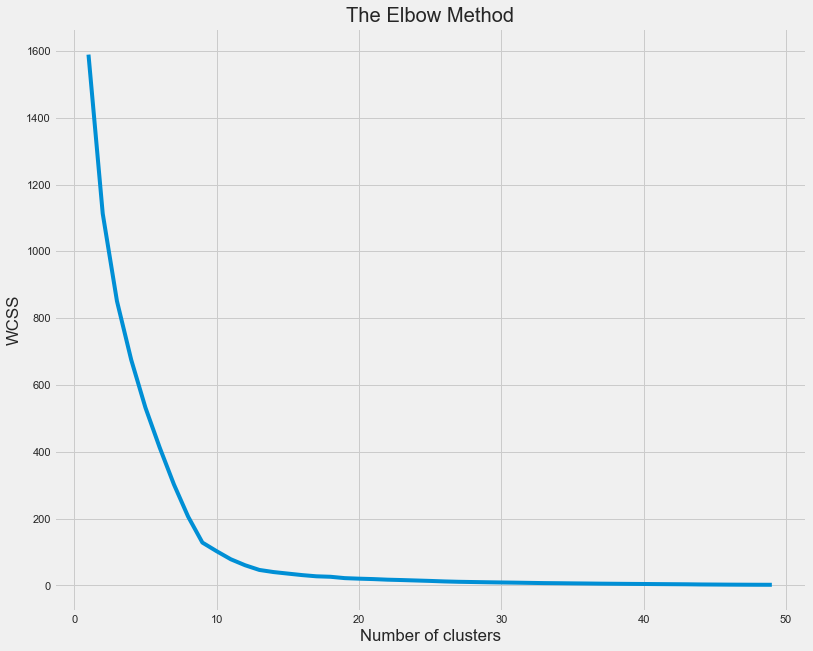

In [9]:
wcss = []
for i in range(1, 50):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 50), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [13]:
kmeans = KMeans(n_clusters = 8, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [14]:
cluster_df['cluster'] = y_kmeans

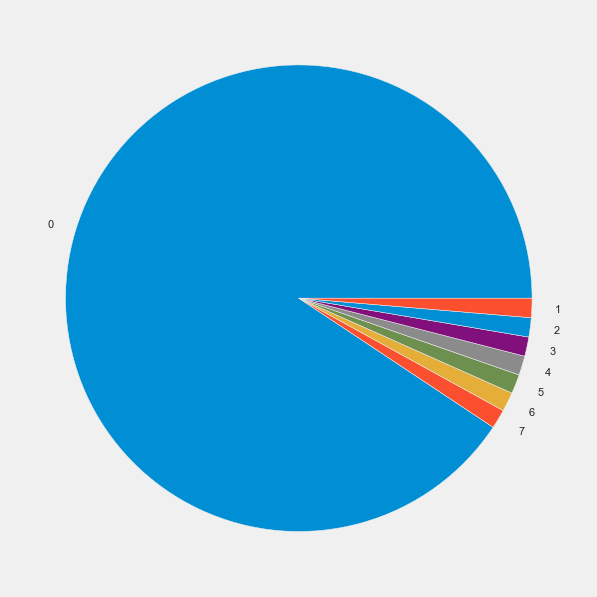

In [15]:
plt.pie(cluster_df.cluster.value_counts(), labels=cluster_df.cluster.value_counts().index)
plt.show()

In [16]:
pd.set_option('display.max_rows', None)
cluster_df['cluster'].to_frame()[cluster_df['cluster'].to_frame().cluster != 0]

,cluster
Major Class,
"COUGH COLD, INCL FLU ANTIVIRALS",7
HOSPITAL SOLUTIONS,2
IMAGING,6
OTHER WOMEN'S HEALTH,3
RESP ANTIVIRALS EX FLU,5
SPEC IMMUNOGLOBULINS & ANTITOXIC SERA,4
"VACCINES (PURE, COMB, OTHER)",1


# Reapply to 0 cluster

In [33]:
cluster0 = list(cluster_df['cluster'].to_frame()[cluster_df['cluster'].to_frame().cluster == 0].index)
cluster0_df = cluster_df[cluster_df.index.isin(cluster0)]

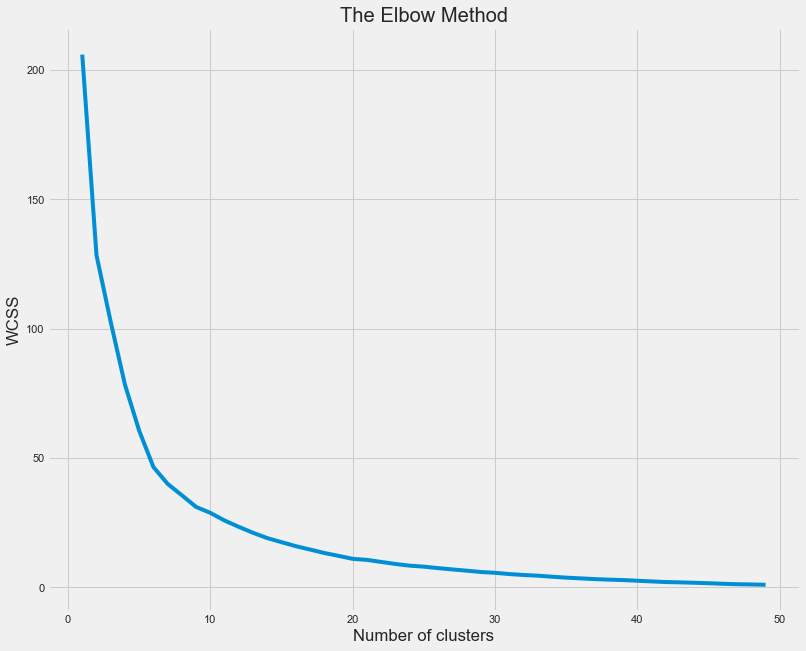

In [34]:
wcss = []
for i in range(1, 50):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(cluster0_df.values)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 50), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [44]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(cluster0_df.values)

In [45]:
cluster0_df['cluster'] = y_kmeans

<ipython-input-45-130f2c7ae38f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster0_df['cluster'] = y_kmeans


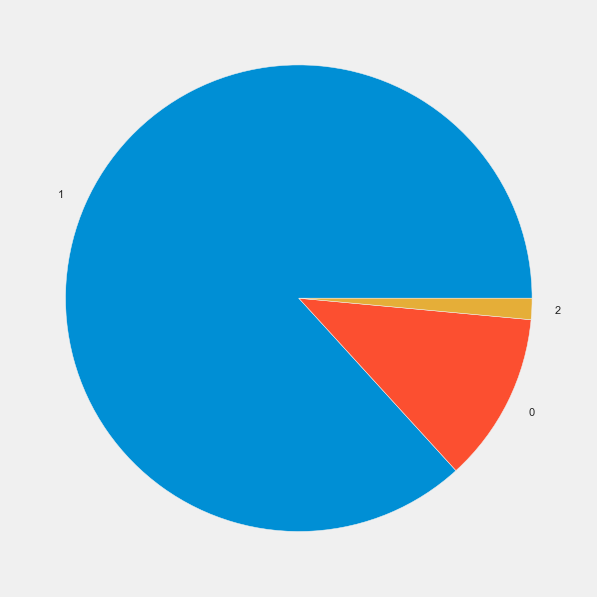

In [46]:
plt.pie(cluster0_df.cluster.value_counts(), labels=cluster0_df.cluster.value_counts().index)
plt.show()

In [56]:
cluster0_df['cluster'].to_frame()[cluster0_df['cluster'].to_frame().cluster == 0]

,cluster
Major Class,
A05A1 CHOLERETICS+CHOLEKINETIC,0
ALL OTHER RESPIRATORY,0
ANTI-INFLAMMATORY AND DIGESTIVE ENZYMES AND MODULA,0
GROWTH HORMONES,0
J07D6 TUBERCULOSIS VACCINES,0
LABOUR INDUCERS,0
THROMBOPOIETIN AGONISTS,0
THYROID ANTI-THYROID AND IODINE PREPS,0


# TODO Clustering by volume weighted WAC